# Bar plots for model comparison (32 subjects), without no-bias

In [15]:
import glam
import pandas as pd
import numpy as np
import os.path
import numpy
import statistics 

import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF
import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob
import os

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Define the values of  WAIC for the models


In [16]:
D_Inv_Full1 = np.load(str('results/waic/glam_PF2019_full_individual_Less_Inv_NoBin_excludedTrial_Gamma-11_NUTS_32.npy'))
D_Full1 = np.load(str('results/waic/glam_PF2019_full_individual_Less_NoBin_excludedTrial_Gamma-11_NUTS_32.npy'))
#D_NoBias1 = np.load(str('results/waic/glam_PF2019_nobias_individual_Dislike_NoBin_Gamma-11_NUTS_31.npy'))
#D_Inv_NoBias1 = np.load(str('results/waic/glam_PF2019_nobias_individual_Dislike_Inv_NoBin_Gamma-11_NUTS_31.npy'))

L_Full1 = np.load(str('results/waic/glam_PF2019_full_individual_More_NoBin_excludedTrial_Gamma-11_NUTS_32.npy'))
#L_NoBias1 = np.load(str('results/waic/glam_PF2019_nobias_individual_Like_NoBin_Gamma-11_NUTS_31.npy'))

In [17]:
# extract waic values
D_Inv_Full = []
D_Full = []
#D_NoBias = []
#D_Inv_NoBias = []
L_Full = []
#L_NoBias = []

# Participants to remove 
toElmiminate = [1,13,16,20]
toDrop = [x - 1 for x in toElmiminate]

for i in range(len(D_Inv_Full1)):
    
    #Skip excluded participants (unestable simulations)
    if i in toDrop:
            continue
    
    D_Inv_Full.append(D_Inv_Full1[i][0]) 
    D_Full.append(D_Full1[i][0])
 #   D_NoBias.append(D_NoBias1[i][0])
 #   D_Inv_NoBias.append(D_Inv_NoBias1[i][0]) 
    L_Full.append(L_Full1[i][0]) 
 #   L_NoBias.append(L_NoBias1[i][0]) 



In [18]:
# Load WAIC-score
Models_WAIC = [np.mean(L_Full),np.mean(D_Inv_Full),np.mean(D_Full)]
Models_WAIC_part = [L_Full,D_Inv_Full,D_Full]

x = np.arange(len(Models_WAIC))

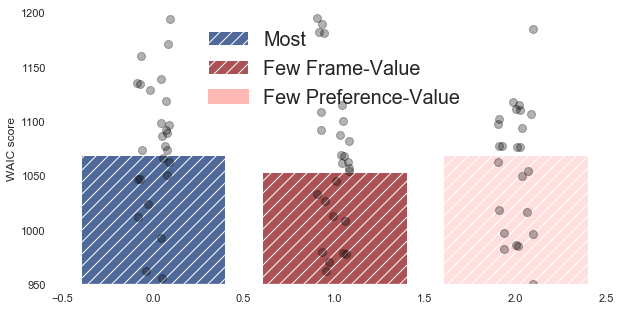

In [19]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.set(style='white', font_scale=1.8)

ax.set_facecolor('xkcd:white')
plt.bar(x, Models_WAIC, color=['#4F6A9A',  '#AC5255', '#FFDFDD'],hatch='//')
#plt.xticks(x, ('', 'Frame-Evidence', 'Preference-Evidence'))
plt.ylim(950, 1200)
plt.ylabel('WAIC score')

like_patch = mpatches.Patch(facecolor='#4F6A9A',hatch='//', label='Most')
dislike_patch = mpatches.Patch(facecolor='#AC5255',hatch='//', label='Few Frame-Value')
dislike2_patch = mpatches.Patch(color='#FFB9B4',hatch='', label='Few Preference-Value')

leg = plt.legend(handles=[like_patch,dislike_patch,dislike2_patch])
leg.get_frame().set_facecolor('none')
leg.get_frame().set_linewidth(0.0)

for i in range(len(Models_WAIC)):
    position_parts= np.full(len(Models_WAIC_part[i]),i, dtype=int)
    jittr = np.random.uniform(low=-0.2,high=0.2,size=len(Models_WAIC_part[i]))/2
    ax.plot(position_parts+jittr, Models_WAIC_part[i], marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
sns.despine()

plt.show()

#fig.savefig(str('SavedFigures/GLAM_individual_WAIC_ModelComparison_31.png'), dpi = 200 )

### No participants dots

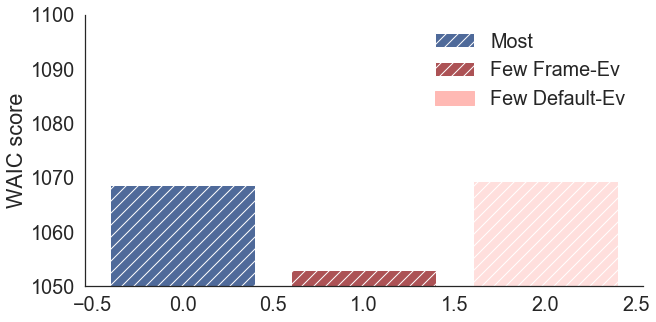

In [20]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.set(style='white', font_scale=1.8)

ax.set_facecolor('xkcd:white')
plt.bar(x, Models_WAIC, color=['#4F6A9A',  '#AC5255', '#FFDFDD'],hatch='//')
#plt.xticks(x, ('', 'Few Frame-Value', 'Few Preference-Value'))
plt.ylim(1050, 1100)
plt.ylabel('WAIC score')

like_patch = mpatches.Patch(facecolor='#4F6A9A',hatch='//', label='Most')
dislike_patch = mpatches.Patch(facecolor='#AC5255',hatch='//', label='Few Frame-Ev')
dislike2_patch = mpatches.Patch(color='#FFB9B4',hatch='//', label='Few Default-Ev')

leg = plt.legend(handles=[like_patch,dislike_patch,dislike2_patch])
leg.get_frame().set_facecolor('none')
leg.get_frame().set_linewidth(0.0)


sns.despine()

plt.show()

fig.savefig(str('SavedFigures/PF2019_GLAM_individual_WAIC_ModelComparison_GLAM_excluded.png'), dpi = 200 )

In [21]:
Models_WAIC

[1068.589806620572, 1053.0670132389903, 1069.3484985350738]

In [22]:
def ttestsPlot(data1, data2,c1 ='#4F6A9A',c2 = '#AC5255',lab1 = "Like", lab2 = "Dislike",title = ''):

    # t-TEST
    diff = mean(data1) - mean(data2)
    [s, p] = stats.ttest_rel(data1,data2)
    print ("data1 = "+ str(mean(data1))+ "; data2 = "+ str(mean(data2))+"; [data1 - data2] =  " + str(diff) +"; t =  " + str(round(s,2)) + " ; p-value =" + str(p) )
    
        
    # PLOT LIKE AND DISLIKE VARIABILITY
        
    # Set seaborn style for the plot
    fig = plt.figure(figsize=[6,10])
    sns.set(style='white',font_scale=1.5)
    jittr = np.random.uniform(low=-0.3,high=0.3,size=len(data1))    
    plt.scatter([1]*len(data1)+jittr, data1, c= c1, alpha=0.7,label=lab1,hatch='//')
    plt.scatter([2]*len(data2)+jittr, data2, c= c2, alpha=0.7,label=lab2)
    
    ## add lines between slope points in like and dislike for each participant
    count = 0
    for i in range(len(data1)):
        plt.plot( [1 + jittr[i],2 + jittr[i]], [ data1[i] , data2[i]],'--', lw=1.0, color = 'black', alpha = 0.2)
        #if data1[i] < data2[i]:
        print ("Participants with InvFull > Full: " + str(i+1) + '. Difference : ' + str(data1[i] - data2[i]))
            #count+=1
    print ("Total number of participants with lower WAIC for " + lab1+ ' : ' + str(count))
        
    #legend(loc = 'best')
    plt.xticks([1, 2,], [lab1, lab2],fontsize=18)
    plt.ylabel(title, fontsize=18)
    sns.despine()

data1 = 1053.0670132389903; data2 = 1069.3484985350738; [data1 - data2] =  -16.281485296083474; t =  -8.32 ; p-value =6.3375034416066735e-09
Participants with InvFull > Full: 1. Difference : -9.936362106427168
Participants with InvFull > Full: 2. Difference : -5.026456500164727
Participants with InvFull > Full: 3. Difference : -2.8850741158071287
Participants with InvFull > Full: 4. Difference : -2.548168744961913
Participants with InvFull > Full: 5. Difference : -5.054251180675919
Participants with InvFull > Full: 6. Difference : -11.398965893521563
Participants with InvFull > Full: 7. Difference : -8.065179164694655
Participants with InvFull > Full: 8. Difference : -13.557680230336246
Participants with InvFull > Full: 9. Difference : -17.73174892008433
Participants with InvFull > Full: 10. Difference : -24.443659046667108
Participants with InvFull > Full: 11. Difference : -14.672781730696101
Participants with InvFull > Full: 12. Difference : -5.598191010104529
Participants with InvFu

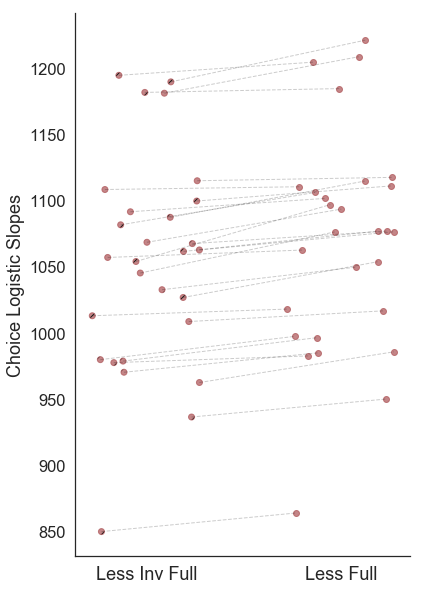

In [23]:
ttestsPlot(Models_WAIC_part[1], Models_WAIC_part[2],'#AC5255','#AC5255',"Less Inv Full",  "Less Full",title = 'Choice Logistic Slopes')
#plt.savefig('SavedFigures/SlopesConfidenceComparison.svg', format='svg', dpi = 500 )

## Plot individual participants score

### Calculate individual difference Waic_InvVal_less - Waic_less

In [24]:
# Load WAIC-score
from numpy import matrix

a = matrix(Models_WAIC_part[1])
b = matrix(Models_WAIC_part[2] )
Models_Waic_dislike_delta =np.array( a - b)[0]

x = np.arange(len(Models_Waic_dislike_delta))

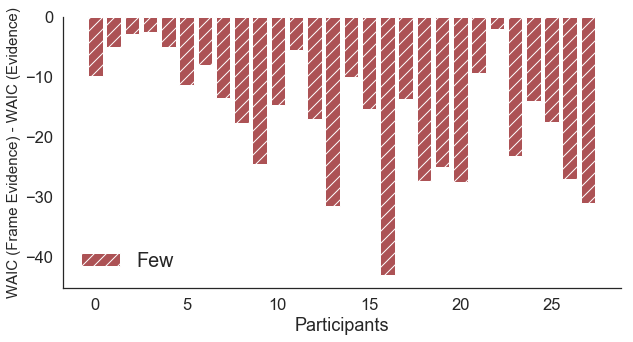

In [25]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.set(style='white', font_scale=1.8)

ax.set_facecolor('xkcd:white')
plt.bar(x, Models_Waic_dislike_delta, color=['#AC5255'],hatch='//')
#plt.xticks(x, (' Frame Value - Reward Value'))
#plt.ylim(950, 1200)
plt.ylabel('WAIC (Frame Evidence) - WAIC (Evidence)',fontsize=15)
plt.xlabel('Participants')

dislike_patch = mpatches.Patch(facecolor='#AC5255',hatch='//', label='Few')
leg = plt.legend(handles=[dislike_patch])
leg.get_frame().set_facecolor('none')
leg.get_frame().set_linewidth(0.0)

#for i in range(len(Models_WAIC)):
#    position_parts= np.full(len(Models_WAIC_part[i]),i, dtype=int)
#    jittr = np.random.uniform(low=-0.2,high=0.2,size=len(Models_WAIC_part[i]))/2
#    ax.plot(position_parts+jittr, Models_WAIC_part[i], marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
sns.despine()
plt.show()

#fig.savefig(str('SavedFigures/GLAM_individual_WAIC_ModelComparison_31.png'), dpi = 200 )

### Same plot but now with participants sorted by their WAIC score difference

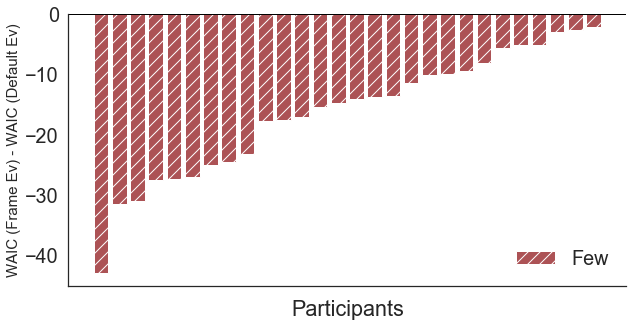

In [26]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.set(style='white', font_scale=1.8)
ax.set_facecolor('xkcd:white')
plt.bar(x, np.sort(Models_Waic_dislike_delta), color=['#AC5255'],hatch='//')
plt.xticks(x, ( ))
#plt.ylim(950, 1200)
plt.ylabel('WAIC (Frame Ev) - WAIC (Default Ev)',fontsize=15)
plt.xlabel('Participants')

dislike_patch = mpatches.Patch(facecolor='#AC5255',hatch='//', label='Few')
leg = plt.legend(handles=[dislike_patch], loc = "lower right")
leg.get_frame().set_facecolor('none')
leg.get_frame().set_linewidth(0.0)

ax.axhline(0, color='black', lw=1)

#for i in range(len(Models_WAIC)):
#    position_parts= np.full(len(Models_WAIC_part[i]),i, dtype=int)
#    jittr = np.random.uniform(low=-0.2,high=0.2,size=len(Models_WAIC_part[i]))/2
#    ax.plot(position_parts+jittr, Models_WAIC_part[i], marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
sns.despine()
plt.show()

fig.savefig(str('SavedFigures/PF2019_GLAM_individual_WAIC_LessPartCompare_GLAMexcluded.png'), dpi = 200 )

## FOR models MORE show the WAIC fits

In [27]:
x = np.arange(len(Models_WAIC_part[0]))

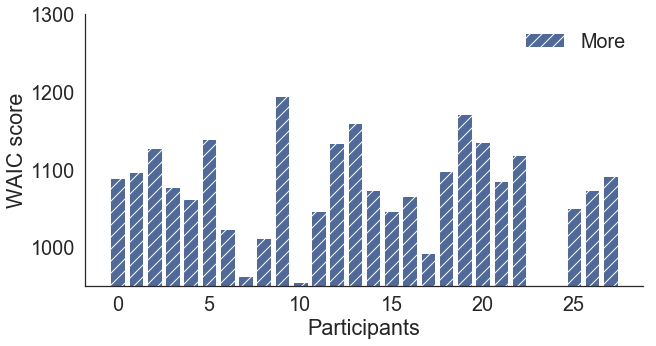

In [28]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.set(style='white', font_scale=1.8)

ax.set_facecolor('xkcd:white')
plt.bar(x, Models_WAIC_part[0], color=['#4F6A9A'],hatch='//')
#plt.xticks(x, (' Frame Value - Reward Value'))
plt.ylim(950, 1300)
plt.ylabel('WAIC score')
plt.xlabel('Participants')

dislike_patch = mpatches.Patch(facecolor='#4F6A9A',hatch='//', label='More')
leg = plt.legend(handles=[dislike_patch])
leg.get_frame().set_facecolor('none')
leg.get_frame().set_linewidth(0.0)

#for i in range(len(Models_WAIC)):
#    position_parts= np.full(len(Models_WAIC_part[i]),i, dtype=int)
#    jittr = np.random.uniform(low=-0.2,high=0.2,size=len(Models_WAIC_part[i]))/2
#    ax.plot(position_parts+jittr, Models_WAIC_part[i], marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
sns.despine()
plt.show()

#fig.savefig(str('SavedFigures/GLAM_individual_WAIC_ModelComparison_31.png'), dpi = 200 )

## ---[END]---